### Visualization Extension - Work in Progress

### Import required packages

In [1]:
import numpy as np
import os
os.chdir('..')
from src.graph.semantic_network import SemanticNetwork
from src.text.text_wrangler import Corpus
from gensim.models import Word2Vec
from src.algorithms import irt

### Train Shakespeare Model

In [257]:
shakespeare = Corpus("docs/shakespeare.txt")
s_model = Word2Vec(shakespeare.sentence_matrix, size = 300,
                 window = 5, min_count=5, workers=8, sg=1)
s_network = SemanticNetwork(embeddings=s_model.wv.vectors, aligned_keys=s_model.wv.index2word)

In [258]:
for i in range(100):
    s_model.train(shakespeare.sentence_matrix, total_examples=len(shakespeare.sentence_matrix),
                epochs=1, compute_loss=True)
    print("Round {} ==================".format(i))
    s_network.update(em_proportion=1, g_proportion=1, include_set=shakespeare.nouns, stop_set=shakespeare.stopwords, thresh=0.8, verbose=True)

Round 0 ==================
Updated 4273663 edges
Round 1 ==================
Updated 2443405 edges
Round 2 ==================
Updated 1193993 edges
Round 3 ==================
Updated 514757 edges
Round 4 ==================
Updated 214463 edges
Round 5 ==================
Updated 95805 edges
Round 6 ==================
Updated 48713 edges
Round 7 ==================
Updated 29493 edges
Round 8 ==================
Updated 20407 edges
Round 9 ==================
Updated 15691 edges
Round 10 ==================
Updated 12911 edges
Round 11 ==================
Updated 11257 edges
Round 12 ==================
Updated 10127 edges
Round 13 ==================
Updated 9287 edges
Round 14 ==================
Updated 8723 edges
Round 15 ==================
Updated 8303 edges
Round 16 ==================
Updated 7889 edges
Round 17 ==================
Updated 7553 edges
Round 18 ==================
Updated 7219 edges
Round 19 ==================
Updated 6939 edges
Round 20 ==================
Updated 6657 edges
Ro

In [259]:
print(s_network.embedding_matrix.shape)

(8147, 300)


<IPython.core.display.Javascript object>


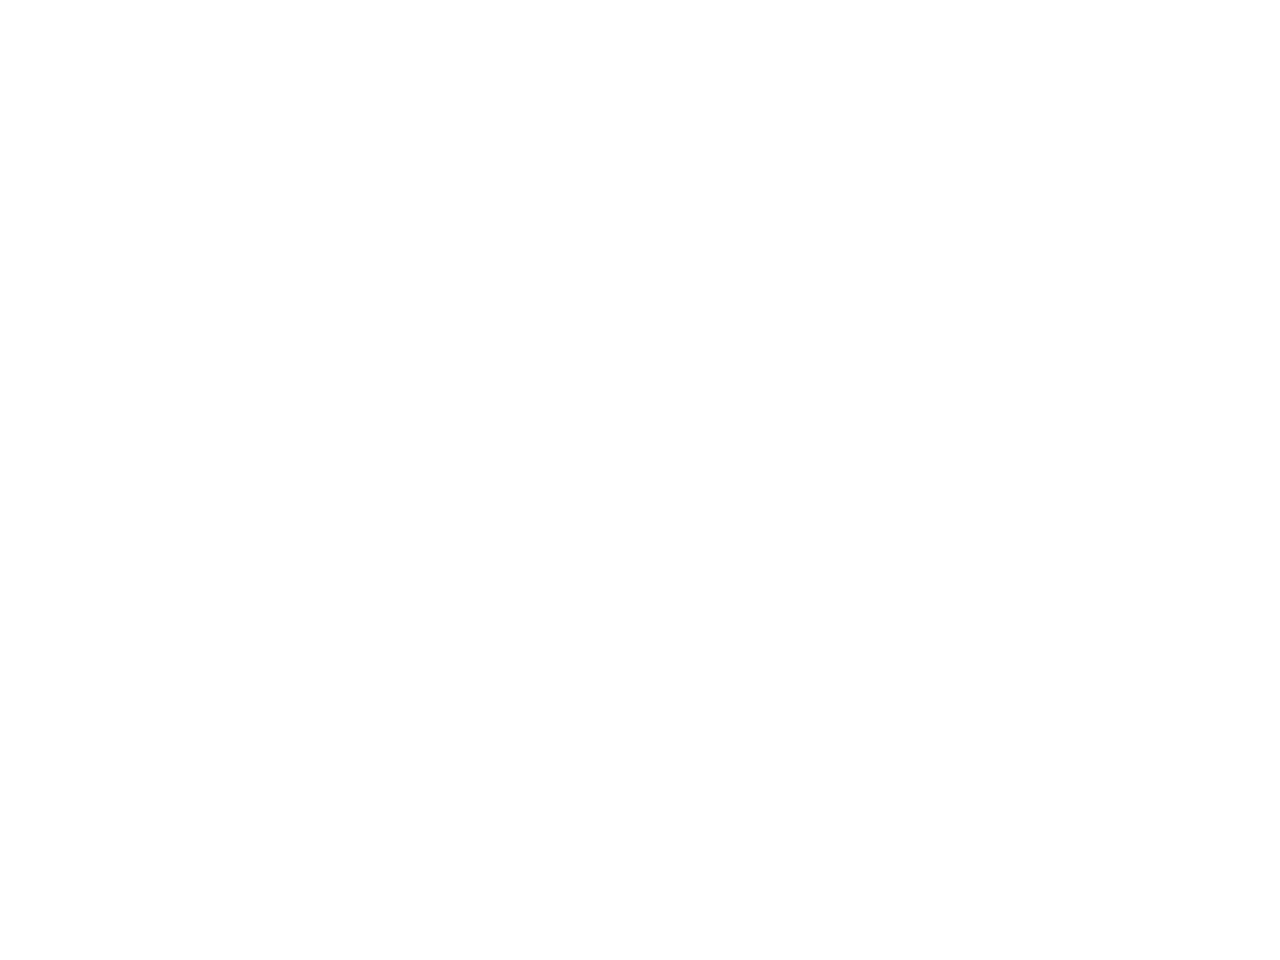

In [260]:
import seaborn as sb
import scipy.io as scio
import scipy.sparse as sc
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

u_s, s_s, v_s = np.linalg.svd(s_network.embedding_matrix)

figure1 = plt.figure()

plt.plot(s_s)
plt.show()

### Train Fairytale Corpus

In [261]:
fairytales = Corpus("docs/fairy_tales.txt")
ft_model = Word2Vec(fairytales.sentence_matrix, size = 300,
                 window = 5, min_count=5, workers=8, sg=1)
ft_network = SemanticNetwork(embeddings=ft_model.wv.vectors, aligned_keys=ft_model.wv.index2word)

In [262]:
for i in range(100):
    ft_model.train(fairytales.sentence_matrix, total_examples=len(fairytales.sentence_matrix),
                epochs=1, compute_loss=True)
    print("Round {} ==================".format(i))
    ft_network.update(em_proportion=1, g_proportion=1, include_set=fairytales.nouns, stop_set=fairytales.stopwords, thresh=0.8, verbose=True)

Round 0 ==================
Updated 699632 edges
Round 1 ==================
Updated 600238 edges
Round 2 ==================
Updated 494332 edges
Round 3 ==================
Updated 381208 edges
Round 4 ==================
Updated 279560 edges
Round 5 ==================
Updated 193406 edges
Round 6 ==================
Updated 126306 edges
Round 7 ==================
Updated 76336 edges
Round 8 ==================
Updated 44202 edges
Round 9 ==================
Updated 25930 edges
Round 10 ==================
Updated 15210 edges
Round 11 ==================
Updated 9402 edges
Round 12 ==================
Updated 6300 edges
Round 13 ==================
Updated 4562 edges
Round 14 ==================
Updated 3642 edges
Round 15 ==================
Updated 2960 edges
Round 16 ==================
Updated 2580 edges
Round 17 ==================
Updated 2334 edges
Round 18 ==================
Updated 2184 edges
Round 19 ==================
Updated 2108 edges
Round 20 ==================
Updated 2042 edges
Round

In [263]:
print(ft_network.embedding_matrix.shape)

(2254, 300)


<IPython.core.display.Javascript object>


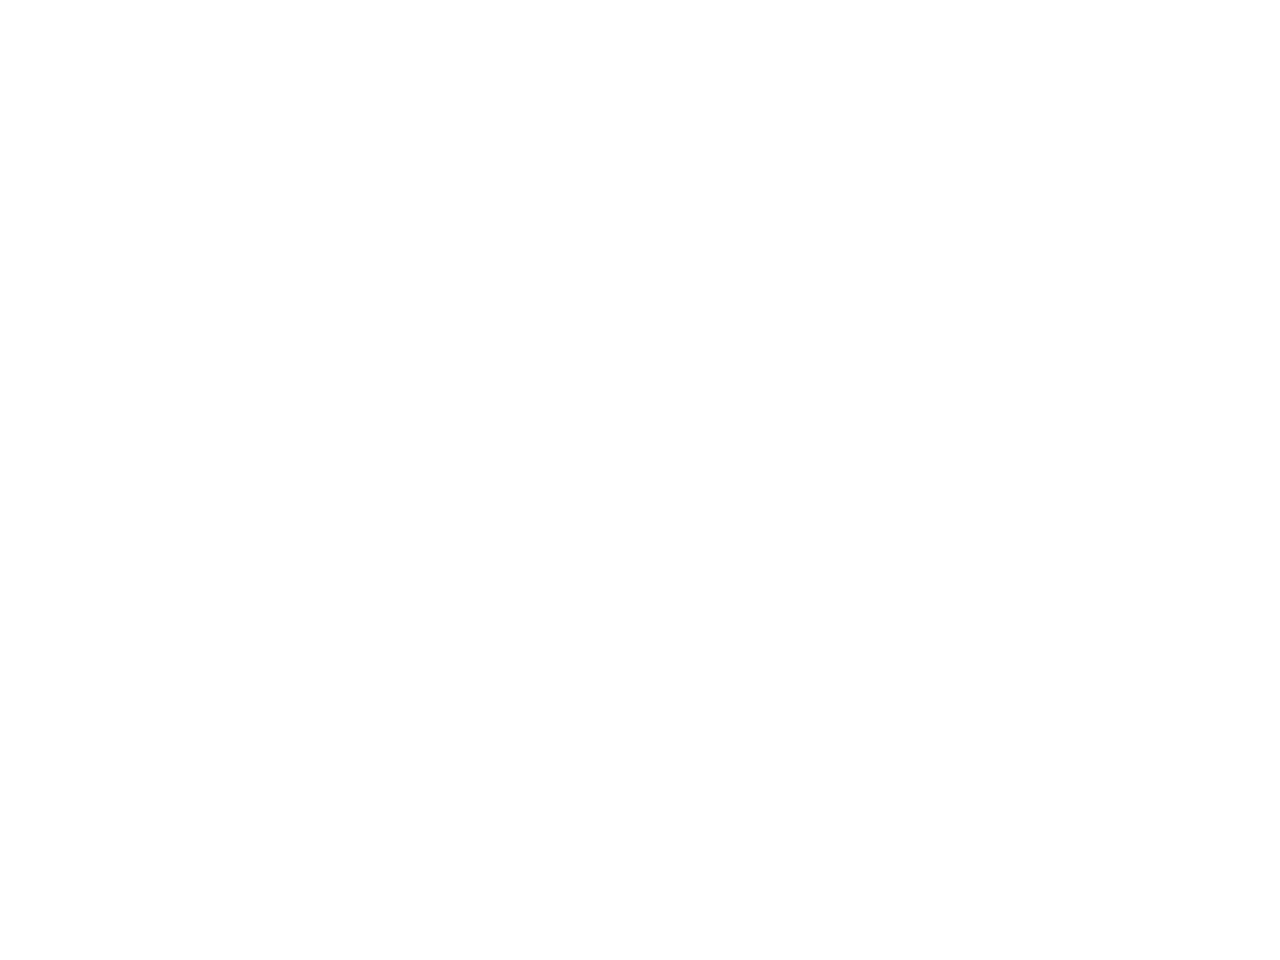

In [264]:
u_f, s_f, v_f = np.linalg.svd(ft_network.embedding_matrix)

figure1 = plt.figure()

plt.plot(s_f)
plt.show()

### Train Wine Review Corpus

In [265]:
wine = Corpus("docs/winemag-data_first150k.csv")
wine_model = Word2Vec(wine.sentence_matrix, size = 300,
                 window = 5, min_count=5, workers=8, sg=1)
wine_network = SemanticNetwork(embeddings=wine_model.wv.vectors, aligned_keys=wine_model.wv.index2word)

In [266]:
for i in range(100):
    wine_model.train(wine.sentence_matrix, total_examples=len(wine.sentence_matrix),
                epochs=1, compute_loss=True)
    print("Round {} ==================".format(i))
    wine_network.update(em_proportion=1, g_proportion=1, include_set=wine.nouns, stop_set=wine.stopwords, thresh=0.8, verbose=True)

Round 0 ==================
Updated 667342 edges
Round 1 ==================
Updated 444278 edges
Round 2 ==================
Updated 316528 edges
Round 3 ==================
Updated 239654 edges
Round 4 ==================
Updated 188362 edges
Round 5 ==================
Updated 152890 edges
Round 6 ==================
Updated 127638 edges
Round 7 ==================
Updated 109646 edges
Round 8 ==================
Updated 95628 edges
Round 9 ==================
Updated 84808 edges
Round 10 ==================
Updated 76018 edges
Round 11 ==================
Updated 69262 edges
Round 12 ==================
Updated 63612 edges
Round 13 ==================
Updated 59172 edges
Round 14 ==================
Updated 55230 edges
Round 15 ==================
Updated 52074 edges
Round 16 ==================
Updated 49166 edges
Round 17 ==================
Updated 46860 edges
Round 18 ==================
Updated 44696 edges
Round 19 ==================
Updated 42802 edges
Round 20 ==================
Updated 41030 

In [267]:
print(wine_network.embedding_matrix.shape)

(22988, 300)


<IPython.core.display.Javascript object>


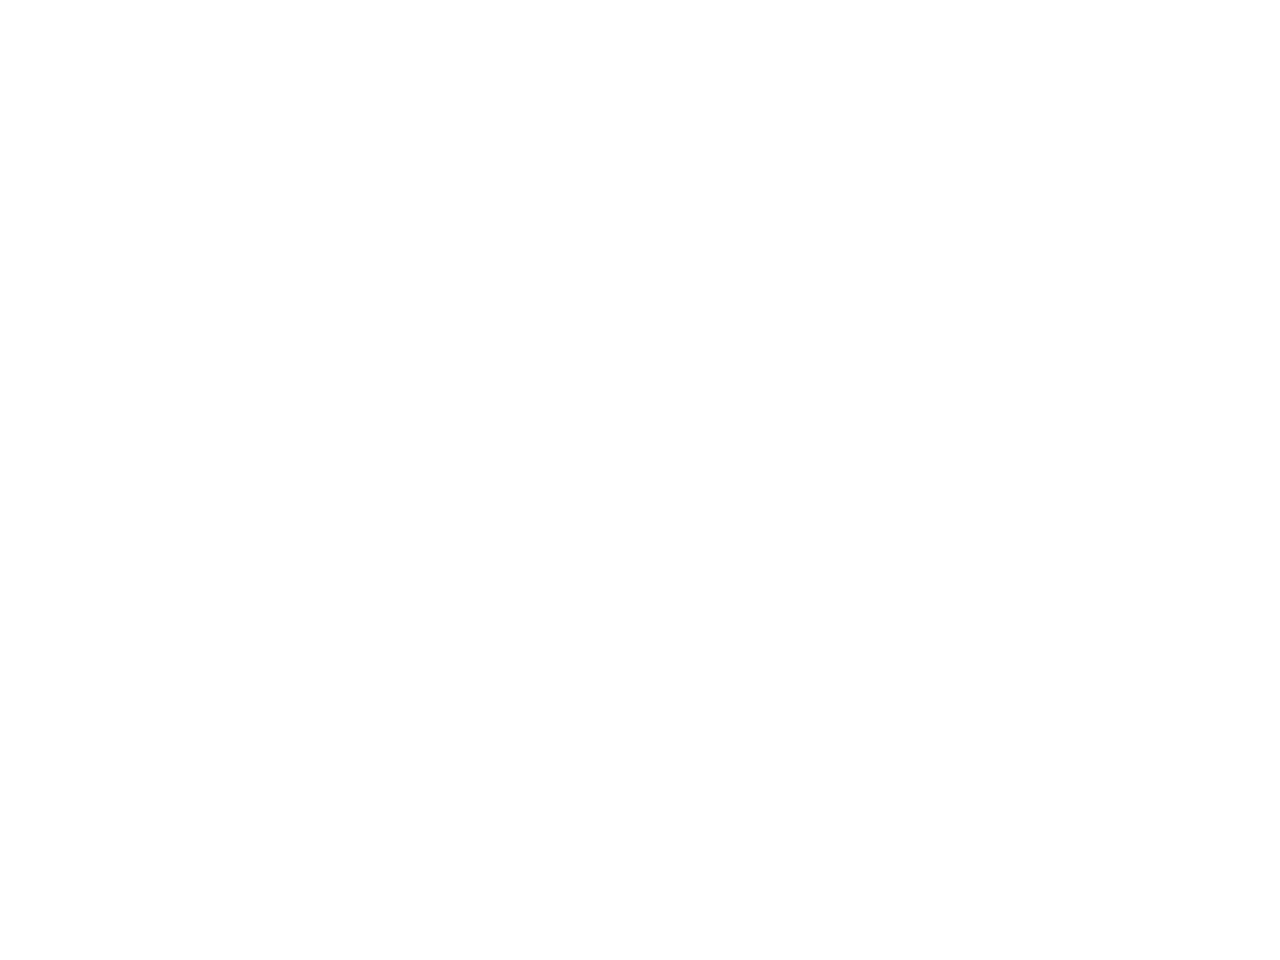

In [268]:
u_w, s_w, v_w = np.linalg.svd(wine_network.embedding_matrix)

figure1 = plt.figure()

plt.plot(s_w)
plt.show()

In [269]:

def trainUoS(X,y,r):
# Learn union of r-dimensional subspaces that best fit a dataset from K classes
# 
# Syntax Ufull = trainUoS(X,y,r)
#
# Inputs:       X is a D x N matrix of training data
#               y is an N x 1 vector of labels
#               r is the rank/dimension of the subspaces
#
# Outputs:      Ufull is a D x r x K matrix where Ufull[:,:,k] is a basis for
#               the subspace that best represents class k
#
# M. A. Lodhi and W. U. Bajwa, "Detection Theory for Union of Subspaces," 
# in IEEE Transactions on Signal Processing, vol. 66, no. 24, pp. 6347-6362, 
# 15 Dec.15, 2018. doi: 10.1109/TSP.2018.2875897


    D, N = np.shape(X)
    K = int(max(y))
    X=sc.coo_matrix.asfptype(X)
    Ufull = np.zeros((D,r,K))
    for kk in range(0,K):
        me, trash, = np.where(y == kk+1)
        Xk = X[:,me]
        Ufull[:,:,kk],s,v = sc.linalg.svds(Xk,r)
        
    return Ufull

In [270]:
sn = s_network.embedding_matrix
fn = ft_network.embedding_matrix
wn = wine_network.embedding_matrix
n_s, d_s = sn.shape
n_f, d_f = fn.shape
n_w, d_w = wn.shape

xtrain = np.vstack((sn, fn, wn))
ytrain = np.vstack((np.ones((1,n_s)).transpose(),2*np.ones((1,n_f)).transpose(),3*np.ones((1,n_w)).transpose()))
Uf = trainUoS(xtrain.transpose(), ytrain, 120)

### Plot 3-D Subspaces

<IPython.core.display.Javascript object>


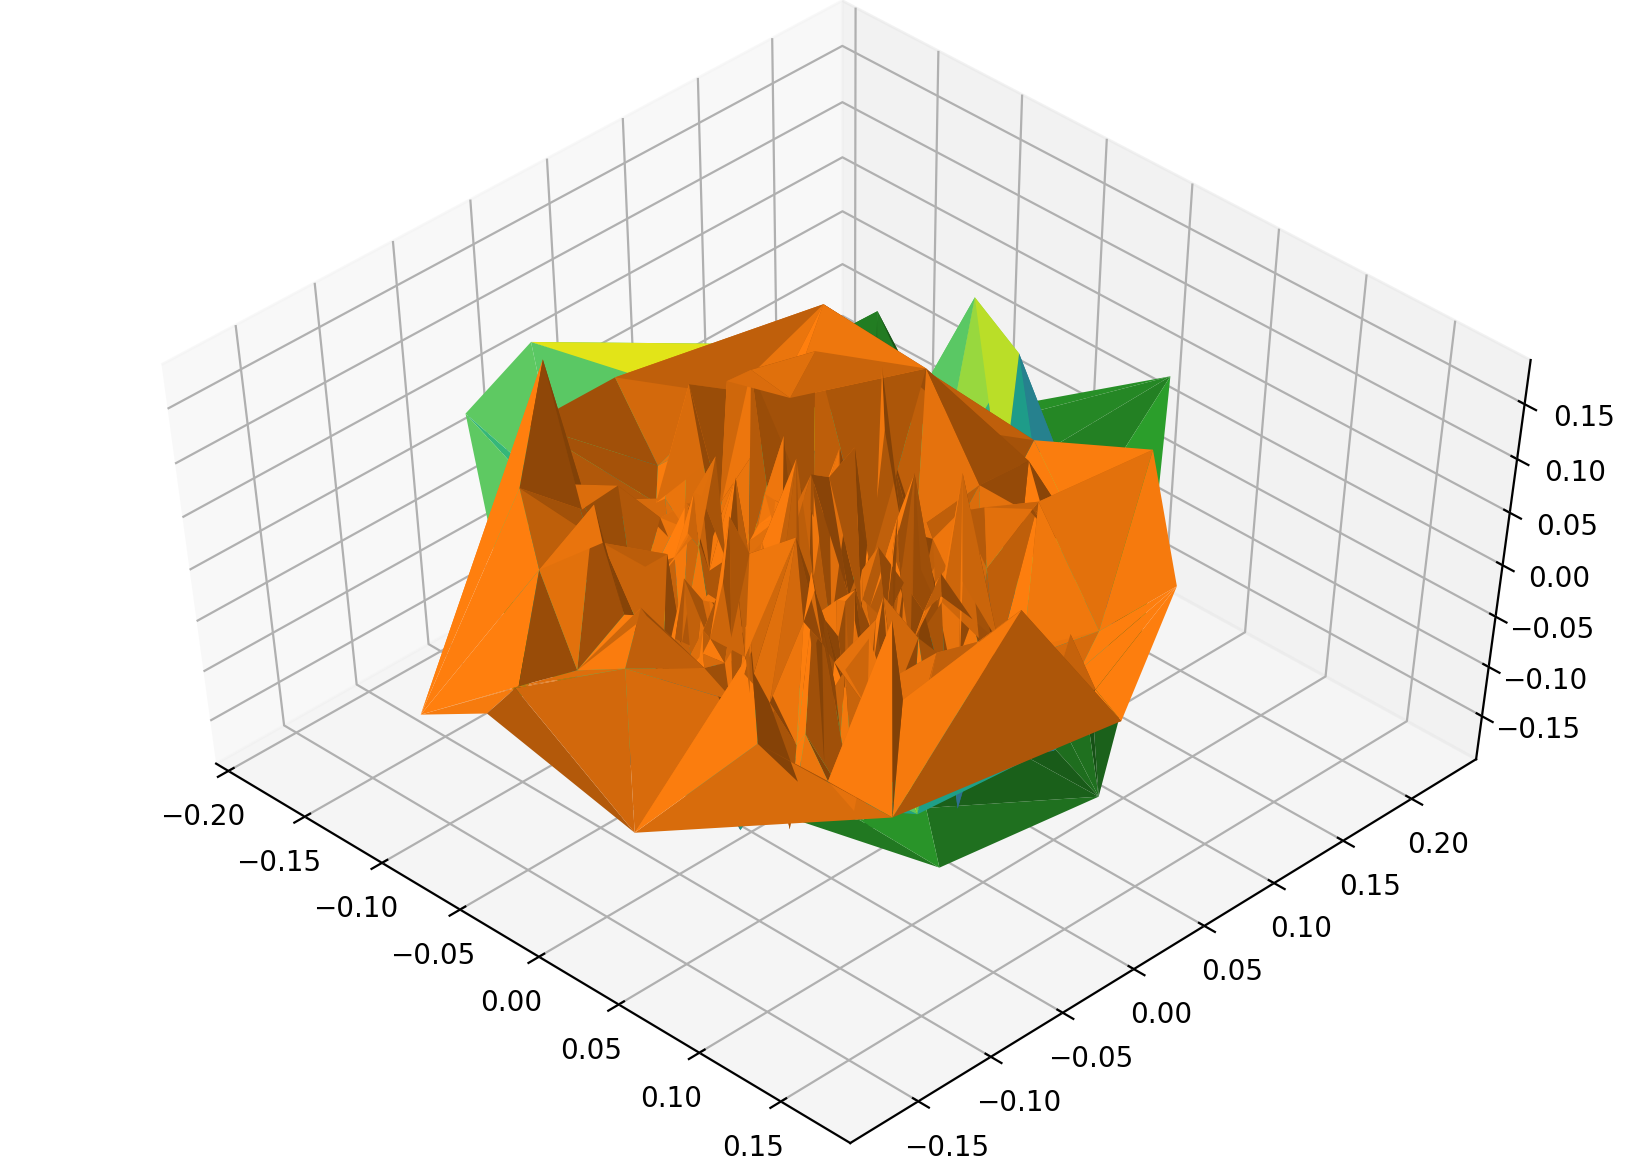

In [312]:
%matplotlib notebook
figure2 = plt.figure()
ax = Axes3D(figure2)
#ax.scatter(Uf[:,0,2], Uf[:,1,2])#, Uf[:,2,2],cmap='viridis', edgecolor='none')
#ax.scatter(Uf[:,0,1], Uf[:,1,1])#, Uf[:,2,1],edgecolor='none')
#ax.scatter(Uf[:,0,0], Uf[:,1,0])#, Uf[:,2,0], edgecolor='none')
ax.plot_trisurf(Uf[:,0,2], Uf[:,1,2], Uf[:,2,2],cmap='viridis', edgecolor='none')
ax.plot_trisurf(Uf[:,0,1], Uf[:,1,1], Uf[:,2,1],edgecolor='none')
ax.plot_trisurf(Uf[:,0,0], Uf[:,1,0], Uf[:,2,0], edgecolor='none')

In [272]:
ytrain.shape

(33389, 1)

In [273]:
S_s = (Uf[:,:,0])@(Uf[:,:,0].transpose())
S_ft = (Uf[:,:,1])@(Uf[:,:,1].transpose())
S_w = (Uf[:,:,2])@(Uf[:,:,2].transpose())

In [274]:
1-(np.sqrt(120-np.trace((S_ft@S_s))))/np.sqrt(120)

0.24599343777237037

In [137]:
s_words = s_network.graph.nodes
# Plotting words and their vector representations

for i in range(len(s_words)):
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.text(x=Uf[i,0,0], y=Uf[i,1,0], s_words[i])
        plt.xlim((-0.5,0.5))
        plt.ylim((-0.5,0.5))

SyntaxError: positional argument follows keyword argument (<ipython-input-137-6b73f117de19>, line 7)

In [275]:
sd.directed_hausdorff(Uf[:,:,2],Uf[:,:,2])

(0.0, 208, 149)

In [276]:
D, r, K = Uf.shape
Uf_ = np.reshape(Uf,(D*r,K))

In [277]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=2, perplexity=100, n_iter=C.C_ITER, learning_rate=C.C_ETA).fit_transform(Uf_)
y_embedded = np.hstack((np.ones(round(D*r/3)), 2*np.ones(round(D*r/3)), 3*np.ones(round(D*r/3))))

In [314]:
X = x_embedded
x_min, x_max = np.min(X, 0), np.max(X, 0)
X = (X - x_min) / (x_max - x_min)

### Plot n-Dimensional Subspaces

<IPython.core.display.Javascript object>


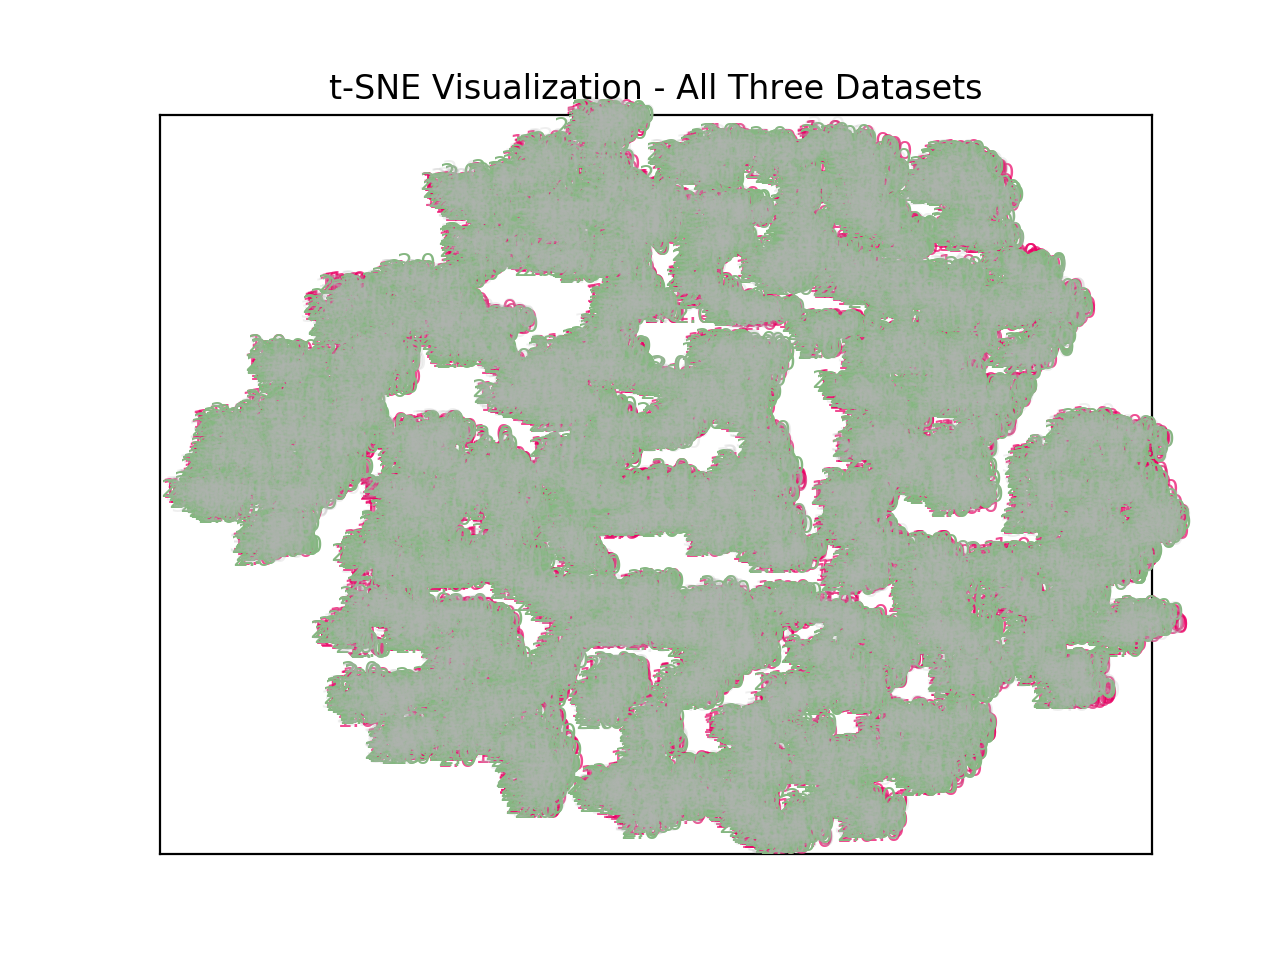

Text(0.5, 1.0, 't-SNE Visualization - All Three Datasets')

In [315]:
%matplotlib notebook
plt.figure()
ax = plt.subplot(111)
for i in range(X.shape[0]):
    if y_embedded[i] == 1:
        clr = '#ea0064'
        a = 0.7
    elif y_embedded[i] == 2: 
        clr = '#85b781'
        a = 1
    elif y_embedded[i] == 3:
        clr = '#b2b2b2'
        a = 0.2
    plt.text(X[i, 0], X[i, 1], str(y_embedded[i]),
             fontdict={ 'size': 9}, color = clr , alpha = a )
    
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])    
plt.title('t-SNE Visualization - All Three Datasets')

<IPython.core.display.Javascript object>


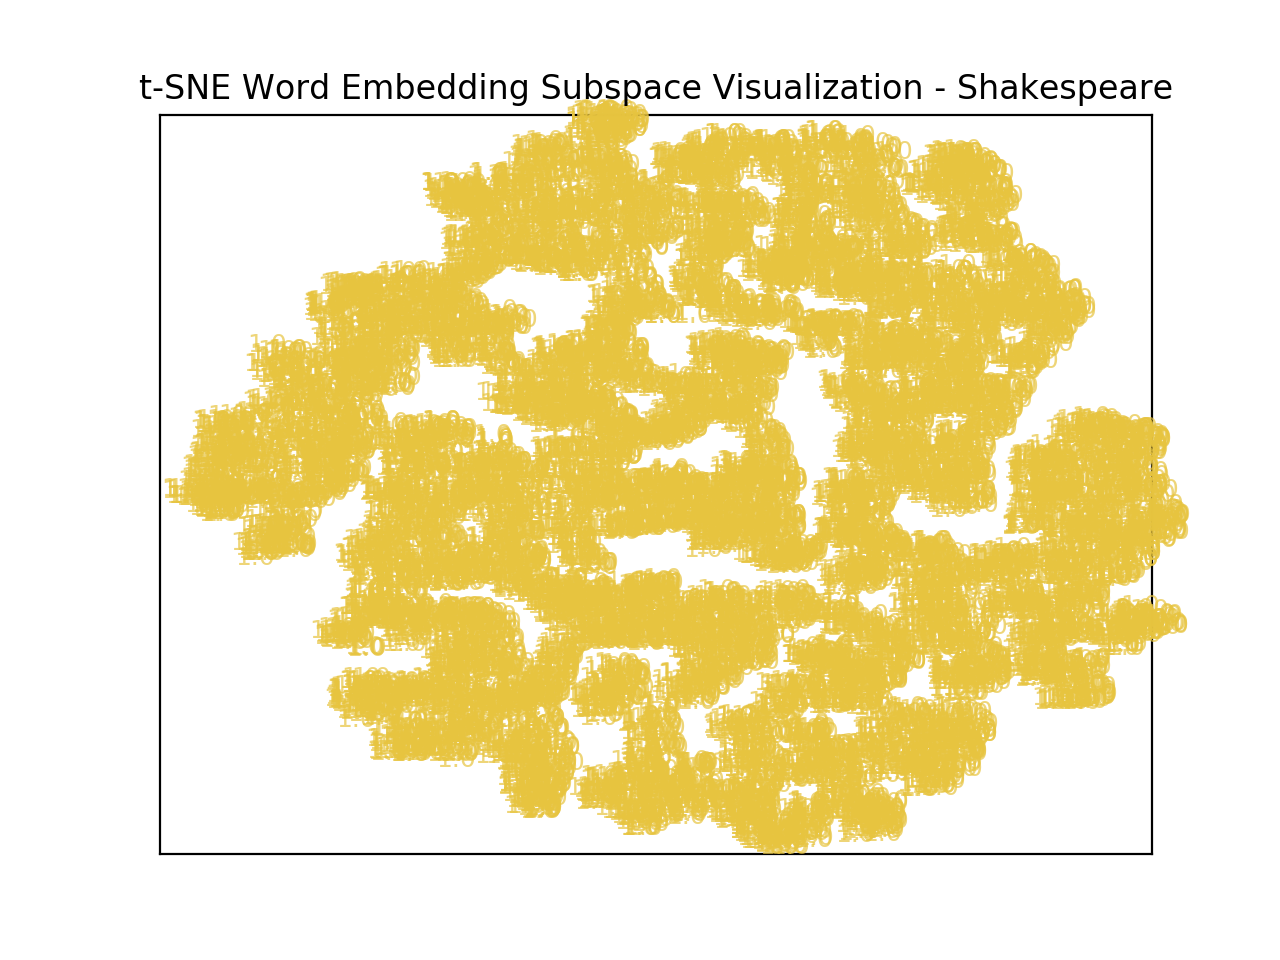

Text(0.5, 1.0, 't-SNE Word Embedding Subspace Visualization - Shakespeare')

In [295]:
%matplotlib notebook
plt.figure()
ax = plt.subplot(111)
for i in range(X.shape[0]):
    if y_embedded[i] == 1:
        clr = '#e7c43f'
        a = 0.7
        plt.text(X[i, 0], X[i, 1], str(y_embedded[i]),
             fontdict={ 'size': 9}, color = clr , alpha = a )
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])    
plt.title('t-SNE Word Embedding Subspace Visualization - Shakespeare')

<IPython.core.display.Javascript object>


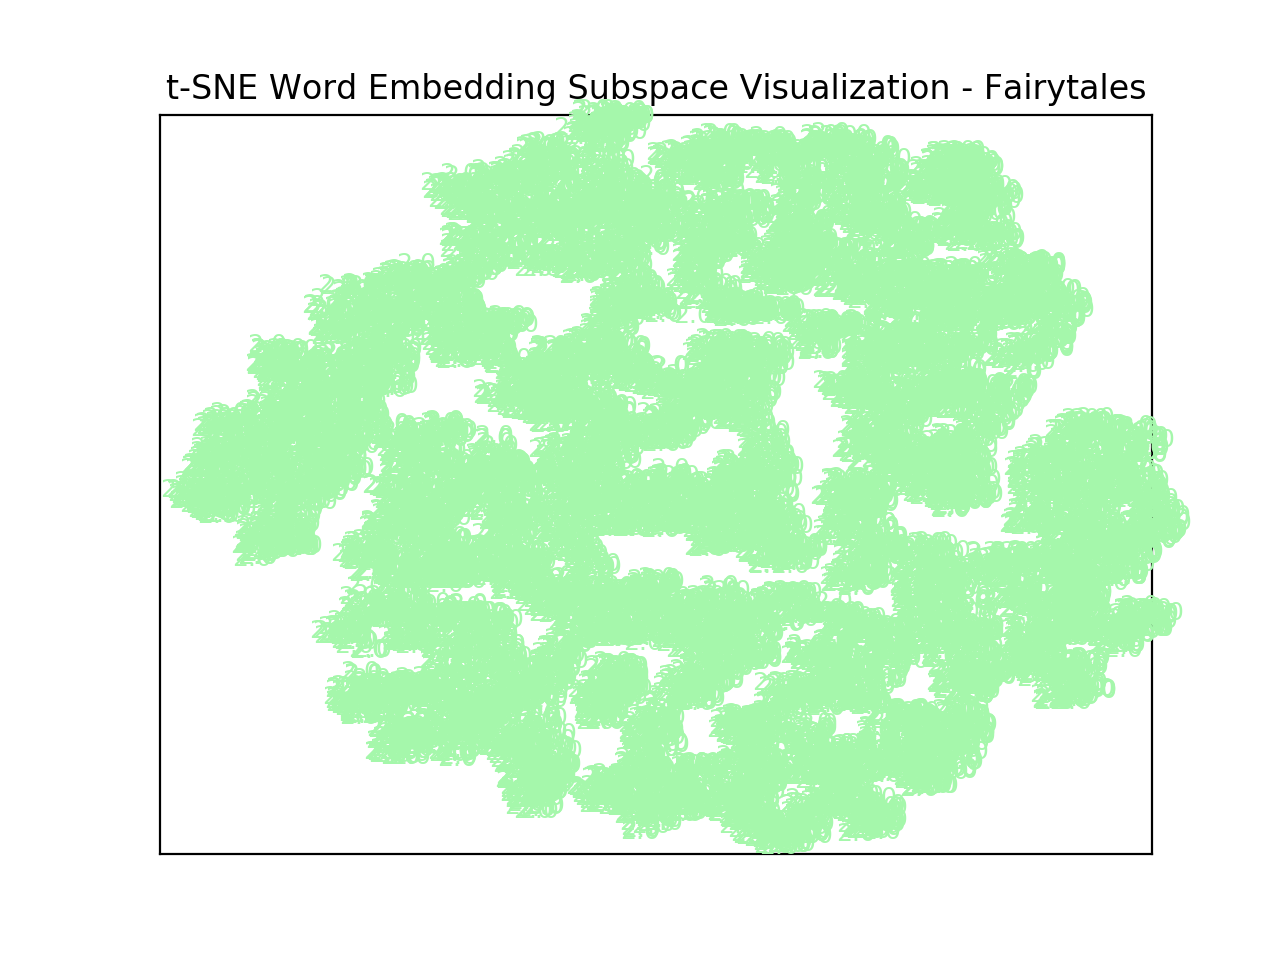

Text(0.5, 1.0, 't-SNE Word Embedding Subspace Visualization - Fairytales')

In [296]:
%matplotlib notebook
plt.figure()
ax = plt.subplot(111)
for i in range(X.shape[0]):
    if y_embedded[i] == 2: 
        clr = '#a5f7ab'
        a = 1
        plt.text(X[i, 0], X[i, 1], str(y_embedded[i]),
             fontdict={ 'size': 9}, color = clr , alpha = a )        
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])    
plt.title('t-SNE Word Embedding Subspace Visualization - Fairytales')

<IPython.core.display.Javascript object>


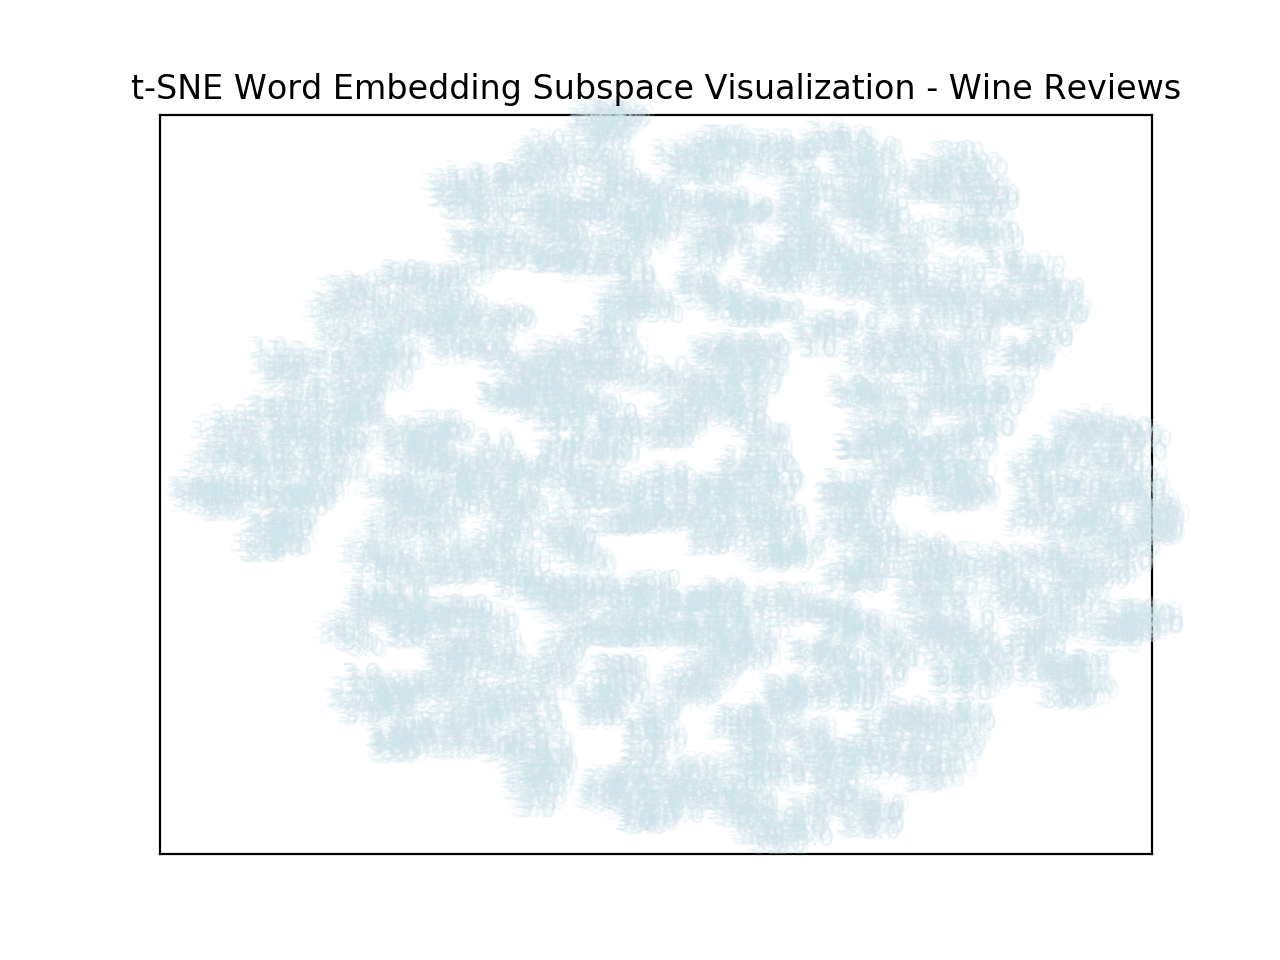

Text(0.5, 1.0, 't-SNE Word Embedding Subspace Visualization - Wine Reviews')

In [297]:
%matplotlib notebook
plt.figure()
ax = plt.subplot(111)
for i in range(X.shape[0]):
    if y_embedded[i] == 3:
        clr = '#cde4eb'
        a = 0.2
        plt.text(X[i, 0], X[i, 1], str(y_embedded[i]),
             fontdict={ 'size': 9}, color = clr , alpha = a )
        
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])    
plt.title('t-SNE Word Embedding Subspace Visualization - Wine Reviews')

In [298]:
xp_embedded = TSNE(n_components=2, perplexity=C.C_PERPLEXITY, n_iter=C.C_ITER, learning_rate=C.C_ETA).fit_transform(xtrain)

<IPython.core.display.Javascript object>


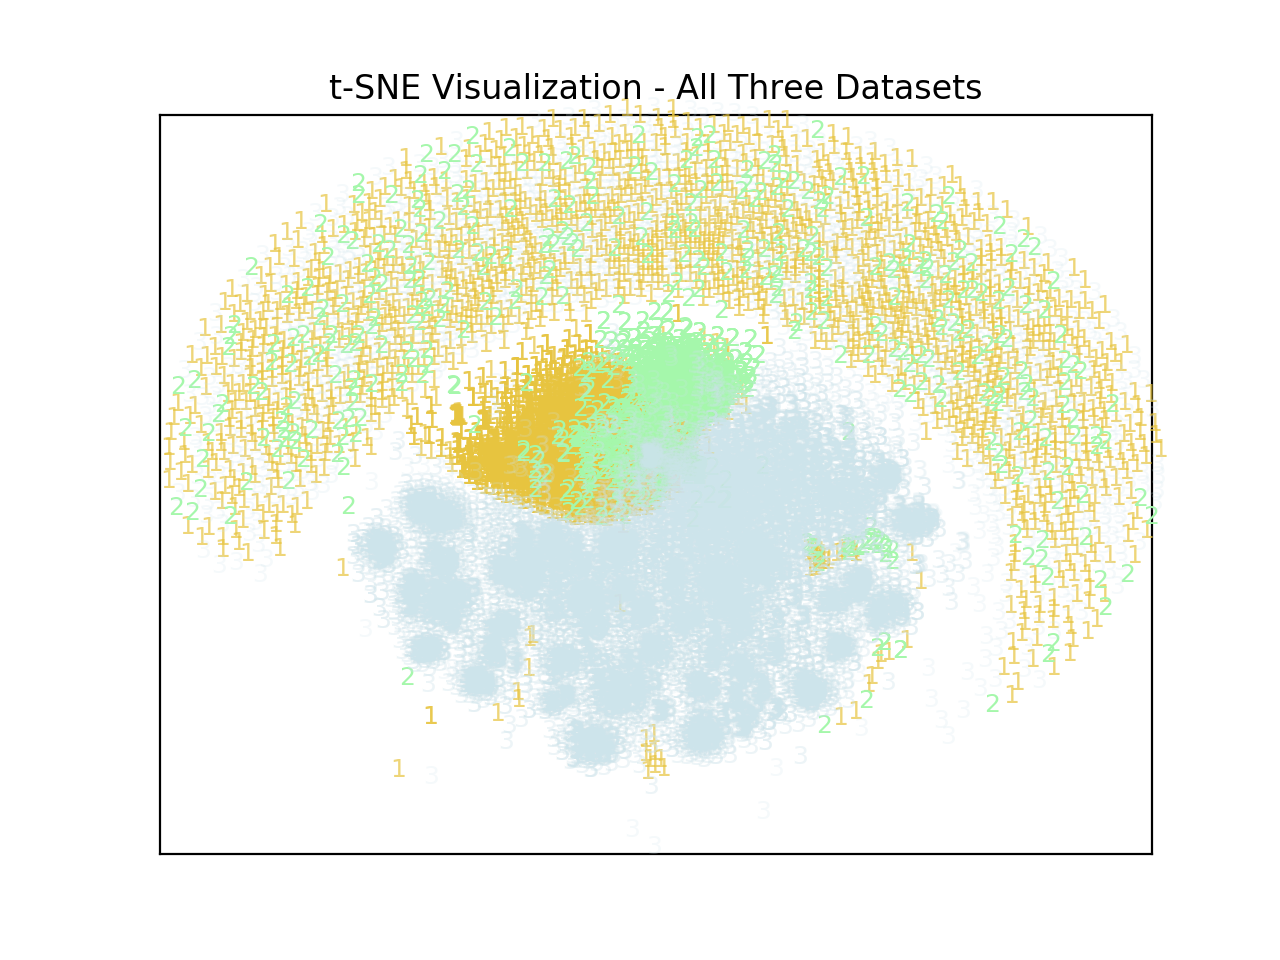

Text(0.5, 1.0, 't-SNE Visualization - All Three Datasets')

In [303]:
%matplotlib notebook
X = xp_embedded
yp_embedded = ytrain.astype(int)
x_min, x_max = np.min(X, 0), np.max(X, 0)
X = (X - x_min) / (x_max - x_min)
plt.figure()
ax = plt.subplot(111)
for i in range(X.shape[0]):
    if yp_embedded[i] == 1:
        clr = '#e7c43f'
        a = 0.7
    elif yp_embedded[i] == 2: 
        clr = '#a5f7ab'
        a = 1
    elif yp_embedded[i] == 3:
        clr = '#cde4eb'
        a = 0.2
    plt.text(X[i, 0], X[i, 1], str(int(yp_embedded[i])),
             fontdict={ 'size': 9}, color = clr , alpha = a )

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])    
plt.title('t-SNE Visualization - All Three Datasets')
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [174]:
yt = np.squeeze(ytrain)
s, = np.where(yt==0)
ft, = np.where(yt==1)
wne, = np.where(yt==2)
emb_shakes = x_embedded[s,:]
emb_fairyt = x_embedded[ft,:]
emb_wine = x_embedded[wne,:]

(9600, 3)

In [158]:
# Generate 2D Embeddings Plot
from src.visualization.tsne_plot import TsnePlot
import src.visualization.constants as C

plot = TsnePlot()

# Process data for full embedding plots
s_words, s_tokens = plot.process_vectors(s_model.wv)
ft_words, ft_tokens = plot.process_vectors(ft_model.wv)
wine_words, wine_tokens = plot.process_vectors(wine_model.wv)

In [311]:
ls = wine_model.wv.most_similar("luscious")
for ent in ls:
        print(ent)

('plush', 0.4156556725502014)
('opulent', 0.4057769477367401)
('lush', 0.40527281165122986)
('lovely', 0.3979853391647339)
('succulent', 0.3606899380683899)
('thick', 0.33574607968330383)
('betulle', 0.33395248651504517)
('gorgeous', 0.3318938612937927)
('delicious', 0.322841078042984)
('lungarotti', 0.32206612825393677)


In [308]:
ls = ft_model.wv.most_similar("wild")
for ent in ls:
        print(ent)

('released', 0.3752746284008026)
('howling', 0.32546722888946533)
('echo', 0.3174715042114258)
('root', 0.3118061423301697)
('tiger', 0.30877774953842163)
('roaring', 0.3081893026828766)
('wood', 0.30018049478530884)
('owl', 0.28686854243278503)
('alice', 0.2817338705062866)
('beast', 0.2775464653968811)
